In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


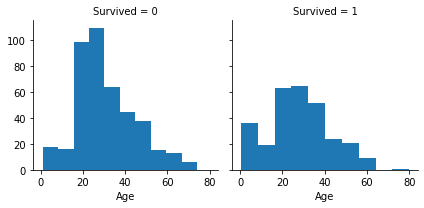

In [18]:
plot = sns.FacetGrid(train, col="Survived")
plot.map(plt.hist, "Age", bins=10)

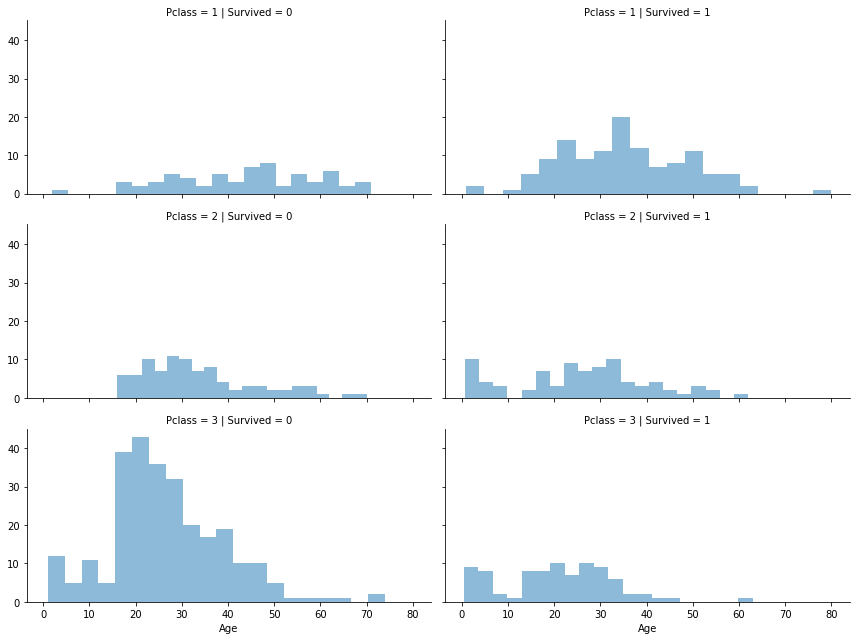

In [21]:
plot = sns.FacetGrid(train, col="Survived", row="Pclass", height=3, aspect=2)
plot.map(plt.hist, "Age", alpha=0.5, bins=20)

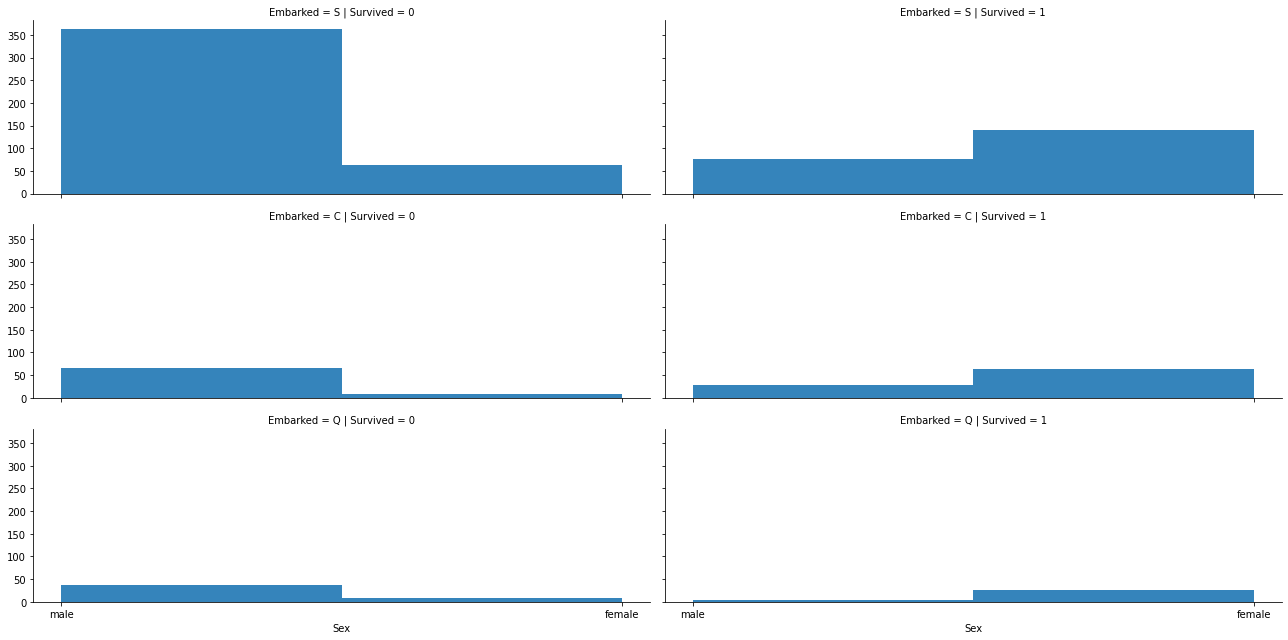

In [28]:
plot = sns.FacetGrid(train, col="Survived", row="Embarked", aspect=3)
plot.map(plt.hist, "Sex", alpha=0.9, bins=2)

In [29]:
print("AS IS", train.shape, test.shape)

AS IS (891, 12) (418, 11)


In [30]:
train_1 = train.drop(["Ticket", "Cabin"], axis=1)
test_1 = test.drop(["Ticket", "Cabin"], axis=1)

In [31]:
print("Af drop", train_1.shape, test_1.shape)

Af drop (891, 10) (418, 9)


In [32]:
combine = [train_1, test_1]
for dataset in combine:
	dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

pd.crosstab(train_1["Title"], train_1["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [36]:
rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"]
for dataset in combine:
	dataset["Title"] = dataset["Title"].replace(rare_titles, "Rare")

	dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
	dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
	dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")

train_1[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [39]:
dataset["Sex"] = dataset["Sex"].replace("male", 0)
dataset["Sex"] = dataset["Sex"].replace("female", 1)

In [41]:
for dataset in combine:
	dataset["Sex"] = dataset["Sex"].replace("male", 0)
	dataset["Sex"] = dataset["Sex"].replace("female", 1)

In [42]:
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Mr


Заменить возраст на год рождения

Переименовать колонки на русский язык

Добавить колонку с количеством родственников

Добавить комментарии ко всем функциям

# Homework
1) Заменить возраст на год рождения
2) Переименовать колонки на русский язык
3) Добавить колонку с количеством родственников
4) Добавить комментарии ко всем функциям

In [6]:
train_copy = train.copy()
test_copy = test.copy()

In [7]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test_copy[:100]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


In [16]:
from datetime import datetime

current_year = datetime.now().year
train_copy["Age"] = current_year - train_copy["Age"]
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2000.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1984.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1996.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1987.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,1987.0,0,0,373450,8.0500,NaN,S


In [21]:
cols_in_russian = ["Идентификатор пассажира", "Выжил", "СоцКласс", "ФИО", "СЕКС",
                   "Возраст", "Кол-во родственников 2ой очереди", "Кол-во родственников 1ой очереди",
                   "Билет", "Цена", "Каюта", "Место вступления на борт"]

train_copy.columns = cols_in_russian
train_copy.head()

,Идентификатор пассажира,Выжил,СоцКласс,ФИО,СЕКС,Возраст,Кол-во родственников 2ой очереди,Кол-во родственников 1ой очереди,Билет,Цена,Каюта,Место вступления на борт
0,1,0,3,"Braund, Mr. Owen Harris",male,2000.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1984.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1996.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1987.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,1987.0,0,0,373450,8.0500,NaN,S


In [22]:
train_copy["Кол-во родственников"] = train_copy["Кол-во родственников 2ой очереди"] + train_copy["Кол-во родственников 1ой очереди"]
train_copy.head()

,Идентификатор пассажира,Выжил,СоцКласс,ФИО,СЕКС,Возраст,Кол-во родственников 2ой очереди,Кол-во родственников 1ой очереди,Билет,Цена,Каюта,Место вступления на борт,Кол-во родственников
0,1,0,3,"Braund, Mr. Owen Harris",male,2000.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1984.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,1996.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1987.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,1987.0,0,0,373450,8.0500,NaN,S,0
